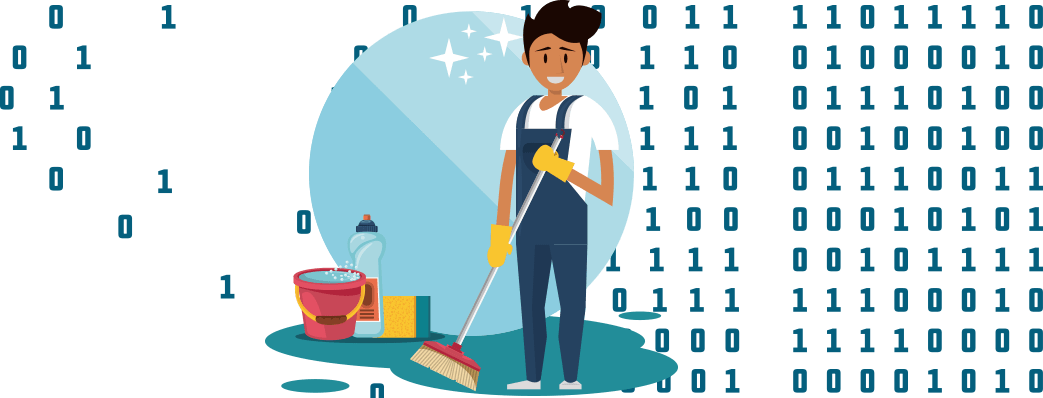

# Libraries

In [5]:
import pandas as pd
import numpy as np
import typing
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [6]:
def load_csv(path: str) -> pd.DataFrame:
    return pd.read_csv(path).iloc[:,1:]

# Handling missing values

In [44]:
def drop_rows_with_missing_title(df: pd):
    df.dropna(axis=0, subset=['pages-count'],inplace=True)

    
def fill_nan_with_missing_backtype(df: pd):
    top = df['back-type'].value_counts().idxmax()
    df['back-type'].fillna(top, inplace=True)

    
def drop_rows_with_missing_author(df: pd):
    df.dropna(axis=0, subset=['author'],inplace=True)
    
    
def fill_nan_with_missing_price(df: pd):
    M = df['price-ILS'].mean()
    df['price-ILS'].fillna(M, inplace=True)
    
    
def drop_rows_with_missing_rating_count(df: pd):
    df.dropna(axis=0, subset=['rating-count'],inplace=True)
    
    
def fill_nan_with_missing_pages_count(df: pd):
    M = df['pages-count'].mean()
    df['pages-count'].fillna(M, inplace=True)

    
def drop_rows_with_missing_dimensions(df: pd):
    df.dropna(axis=0, subset=['width', 'height', 'thickness', 'weight'], how='any',inplace=True)

    
def drop_rows_with_missing_datepublished(df: pd):
    df.dropna(axis=0, subset=['date-published'],inplace=True)
    

def drop_rows_with_missing_bestsellerrank(df: pd):
    df.dropna(axis=0, subset=['bestsellers-rank'],inplace=True)
    

def drop_rows_with_missing_rating(df: pd):    
    df.dropna(axis=0, subset=['rating'],inplace=True)    

In [45]:
def cleaning_nan_values(df: pd):
    df.dropna(axis = 0, thresh = 59, inplace=True)
    
    drop_rows_with_missing_title(df)
    fill_nan_with_missing_backtype(df)
    drop_rows_with_missing_author(df)
    fill_nan_with_missing_price(df)
    drop_rows_with_missing_rating_count(df)
    fill_nan_with_missing_pages_count(df)
    drop_rows_with_missing_dimensions(df)
    drop_rows_with_missing_datepublished(df)
    drop_rows_with_missing_bestsellerrank(df)
    drop_rows_with_missing_rating(df)

# Handling duplicates

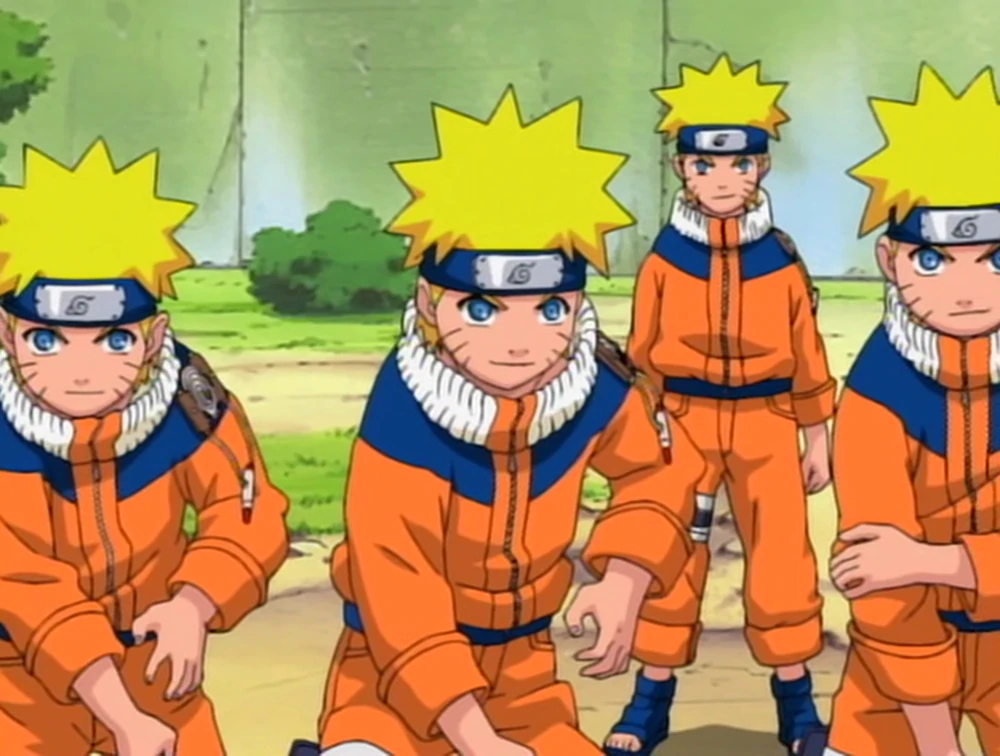

In [46]:
def erase_duplicated_books(df: pd):
    df.drop_duplicates(subset=['title','date-published'], inplace=True,keep='first')

# Handling outliers

In [47]:
def filter_non_books_elements(df: pd) -> pd:
    paperback_mask = df['back-type'] == 'Paperback'
    hardback_mask = df['back-type'] == 'Hardback'
    board_book_mask = df['back-type'] == 'Board book'
    return df[paperback_mask | hardback_mask | board_book_mask]

In [48]:
def drop_irrelevant_books(df: pd) -> pd:
    low_bound_mask = df['pages-count'] >= 100
    upper_bound_mask = df['pages-count'] <= 1500
    return df[low_bound_mask & upper_bound_mask]

In [49]:
def handle_overpriced_books(df: pd) -> pd:
    df['price-ILS'][df['price-ILS'] > 300] = np.nan
    fill_nan_with_missing_price(df)

In [50]:
def drop_rows_with_false_datepublished(df: pd):
    df['date-published'] = pd.to_datetime(df['date-published'])
    return df[(df['date-published'].dt.year < 2021)]
    

In [79]:
def handle_dimensions_outliers(df: pd):
#     m_width = df['width'].mean()
#     m_height = df['height'].mean()
#     m_thickness = df['thickness'].mean()
    m_weight = df['weight'].mean()
#     df['width'][(df['width'] > 2.5 * m_width) | (df['width'] < 5)] = np.nan
#     df['height'][(df['height'] > 2.5 * m_height) | (df['height'] < 50)] = np.nan
#     df['thickness'][(df['thickness'] > 2.5 * m_thickness) | (df['thickness'] <  4)] = np.nan
    df['weight'][(df['weight'] > 2.5 * m_weight) | (df['weight'] <  30)] = np.nan
    
    drop_rows_with_missing_dimensions(df)

In [7]:
path = 'DATA-SET.csv'
df = load_csv(path)

In [77]:
drop_rows_with_missing_dimensions(df)

In [74]:
handle_dimensions_outliers(df)

In [78]:
df.shape

(9307, 65)

In [53]:
cleaning_nan_values(df)

In [54]:
df.shape

(9176, 65)

In [55]:
erase_duplicated_books(df)

In [56]:
df.shape

(9115, 65)

In [57]:
df = filter_non_books_elements(df)

In [58]:
df.shape

(8852, 65)

Text(0, 0.5, 'Number of books')

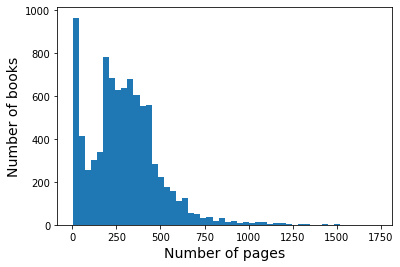

In [59]:
plt.hist(df['pages-count'], bins=50)
plt.xlabel('Number of pages', fontsize=14)
plt.ylabel('Number of books', fontsize=14)

In [60]:
df = drop_irrelevant_books(df)
df.shape

(7228, 65)

Text(0, 0.5, 'Number of books')

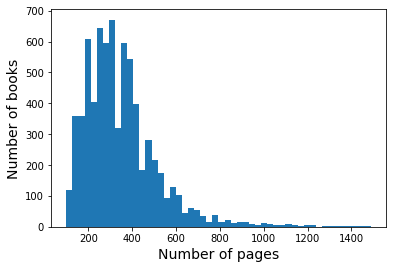

In [61]:
plt.hist(df['pages-count'], bins=50)
plt.xlabel('Number of pages', fontsize=14)
plt.ylabel('Number of books', fontsize=14)

In [62]:
handle_overpriced_books(df)

In [15]:
df[['title','date-published']]

,title,date-published
0,It Ends With Us: The most heartbreaking novel ...,02 Aug 2016
1,Dear Zoo : A Lift-the-flap Book,08 May 2007
2,Sapiens : A Brief History of Humankind,01 May 2015
3,The Barefoot Investor : The Only Money Guide Y...,01 Jul 2018
4,Milk and Honey,08 Jul 2016
...,...,...
9985,The Feed Zone Cookbook : Fast and Flavorful Fo...,01 Nov 2011
9986,City Of Bones,06 Nov 2014
9987,The Boleyn Inheritance,01 May 2007
9988,Suzuki Violin School 2 + CD (Revised),26 Jan 2009


In [3]:
sns.boxplot(df['price-ILS'])

NameError: name 'sns' is not defined

In [65]:
print(df.shape)
df = drop_rows_with_false_datepublished(df)
print(df.shape)

(7228, 65)
(6763, 65)


In [66]:
handle_dimensions_outliers(df)

In [67]:
df.shape

(6068, 65)

In [25]:
df.to_csv('cleaned-data1.csv')